In [2]:
pip install pandas numpy matplotlib scikit-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 



In [5]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
print(df.isnull().sum())
df['gender']= df['gender'].map({'male':0 , 'female':1})
df['test preparation course']= df['test preparation course'].map({'none':0 , 'completed':1})

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


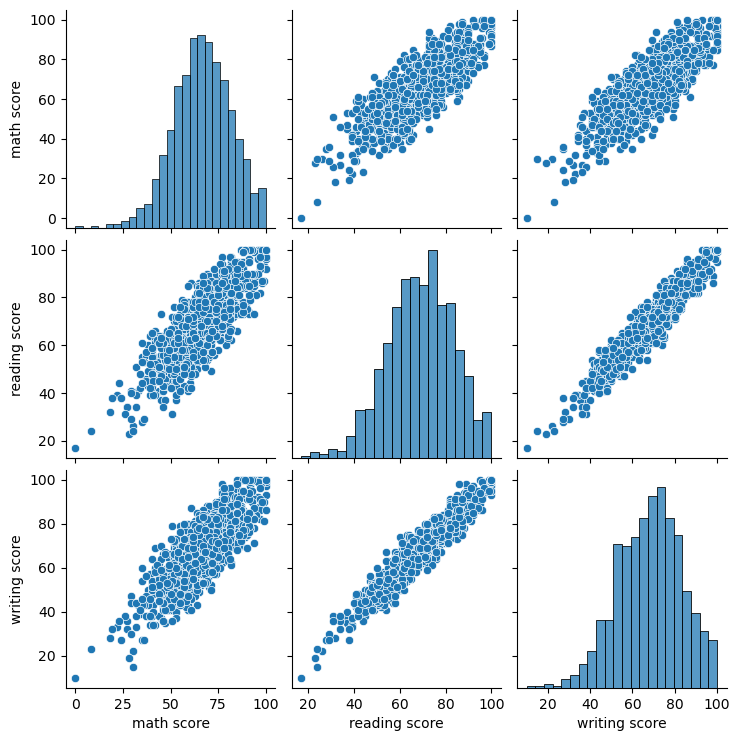

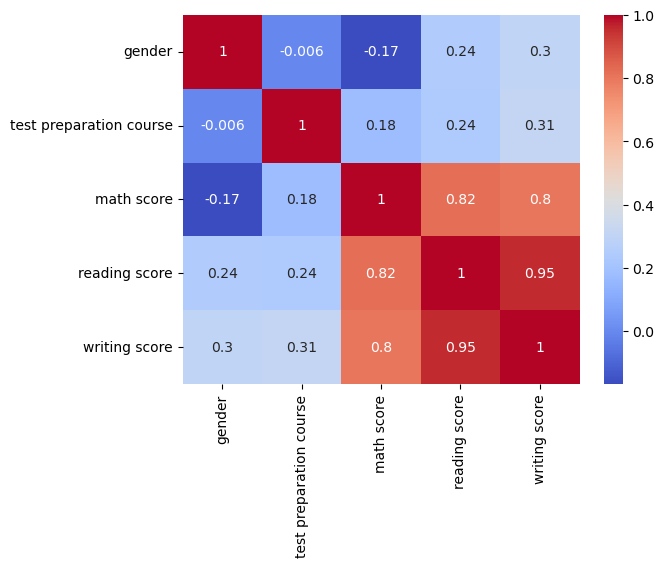

In [8]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.show()
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
X = df[['reading score', 'writing score']]
Y= df['math score']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [12]:
print(X.shape, Y.shape)


(1000, 2) (1000,)


In [15]:
y_pred = model.predict(X_test)

In [16]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")



MAE: 7.351308782530512
MSE: 77.24297821278957
RMSE: 8.788798451027851
R2 Score: 0.6825697127424625


In [17]:
print("Intercept (b):", model.intercept_)
print("Coefficients (m):", model.coef_)

# Equation: y = m1*x1 + m2*x2 + ... + b


Intercept (b): 7.85940588782988
Coefficients (m): [0.57555997 0.27176146]


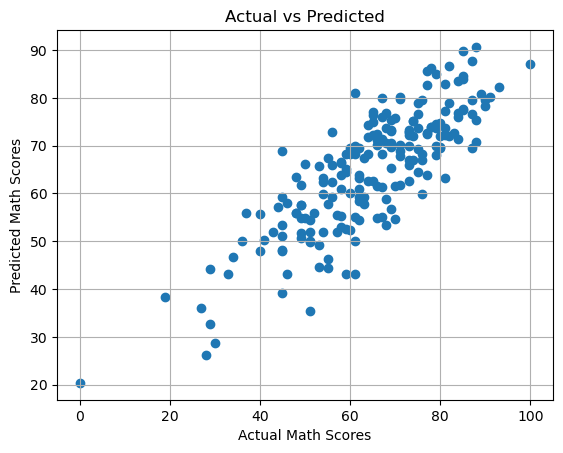

In [19]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()
